- '단승식'은 우승마를 맞추는 것이며, ‘쌍승식’은 1, 2등 말을 순서대로 맞추는 것
- 중량앞에 *표시는 52kg미만의 말이 52kg으로 증량신청한 것을 의미합니다.
- 마주명앞에 ♠표시는 마주복색 등록마주를 의미합니다.
- 장구현황의 +는 신규장구, -는 해지장구를 의미합니다.

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [151]:
df = pd.read_csv('./horse.csv')

In [152]:
df

,순위,마번,마명,산지,성별,연령,중량,레이팅,기수명,조교사명,마주명,도착차,마체중,단승,연승,장구현황
0,1,3,이글스카이,한,수,2세,54.5,NaN,임기원,박윤규,이방훈,NaN,481(-10),1.9,1.0,망사눈
1,2,8,달려라파챠이,한,거,4세,55,NaN,(-1)하정훈,박희철,한영석,목,428(-1),17.4,3.4,"망사눈, 승인재갈"
2,3,7,천녹,한,암,3세,54,NaN,신지,최봉주,조금제,½,450(-17),57.4,16.3,"망사눈, 승인재갈"
3,4,12,큐피드닥터,한,암,3세,54,NaN,신형철,유재길,♠서순배,¾,470(10),4.8,1.6,NaN
4,5,2,소중한성불,한,암,2세,52.5,NaN,조재로,배휴준,♠최동천,¾,450(0),4.4,1.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,6,6,상감마마,한,거,5세,56.5,63.0,이혁,박병일,♠이관형,코,446(0),8.6,2.7,"망사눈, 승인재갈"
108,7,10,아르고황금꽃,미,수,4세,52,54.0,박현우,안병기,김제영,1,509(-7),18.3,4.5,망사눈
109,8,9,에클레어휴머,한,거,4세,51,53.0,(-2)이철경,서인석,♠토마스 리,½,461(10),24.6,6.3,"승인재갈, 눈가면"
110,9,2,유아스타,미,암,4세,53.5,60.0,안효리,이희영,류중하,4,430(-1),22.3,6.2,망사


In [153]:
df['연령'] = df['연령'].apply(lambda x : x[:-1]).astype(int)
df['마체중'] = df['마체중'].apply(lambda x : x[:3]).astype(int)
df['중량'] = df['중량'].apply(lambda x: x[1:] if x.startswith('*') else x).astype(float)

In [154]:
df

,순위,마번,마명,산지,성별,연령,중량,레이팅,기수명,조교사명,마주명,도착차,마체중,단승,연승,장구현황
0,1,3,이글스카이,한,수,2,54.5,NaN,임기원,박윤규,이방훈,NaN,481,1.9,1.0,망사눈
1,2,8,달려라파챠이,한,거,4,55.0,NaN,(-1)하정훈,박희철,한영석,목,428,17.4,3.4,"망사눈, 승인재갈"
2,3,7,천녹,한,암,3,54.0,NaN,신지,최봉주,조금제,½,450,57.4,16.3,"망사눈, 승인재갈"
3,4,12,큐피드닥터,한,암,3,54.0,NaN,신형철,유재길,♠서순배,¾,470,4.8,1.6,NaN
4,5,2,소중한성불,한,암,2,52.5,NaN,조재로,배휴준,♠최동천,¾,450,4.4,1.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,6,6,상감마마,한,거,5,56.5,63.0,이혁,박병일,♠이관형,코,446,8.6,2.7,"망사눈, 승인재갈"
108,7,10,아르고황금꽃,미,수,4,52.0,54.0,박현우,안병기,김제영,1,509,18.3,4.5,망사눈
109,8,9,에클레어휴머,한,거,4,51.0,53.0,(-2)이철경,서인석,♠토마스 리,½,461,24.6,6.3,"승인재갈, 눈가면"
110,9,2,유아스타,미,암,4,53.5,60.0,안효리,이희영,류중하,4,430,22.3,6.2,망사


In [220]:
df.isna().sum()

순위       0
마번       0
마명       0
산지       0
성별       0
연령       0
중량       0
레이팅     23
기수명      0
조교사명     0
마주명      0
도착차     11
마체중      0
단승       0
연승       0
장구현황    29
dtype: int64

In [156]:
df.dtypes

순위        int64
마번        int64
마명       object
산지       object
성별       object
연령        int32
중량      float64
레이팅     float64
기수명      object
조교사명     object
마주명      object
도착차      object
마체중       int32
단승      float64
연승      float64
장구현황     object
dtype: object

In [157]:
df.columns

Index(['순위', '마번', '마명', '산지', '성별', '연령', '중량', '레이팅', '기수명', '조교사명', '마주명',
       '도착차', '마체중', '단승', '연승', '장구현황'],
      dtype='object')

### 순위에 대한 상관계수

<AxesSubplot:>

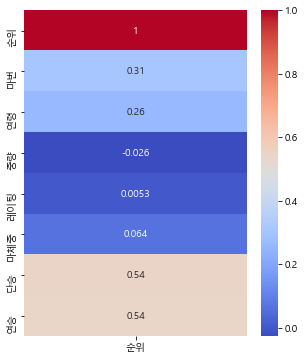

In [172]:
plt.figure(figsize=(5, 6))
sns.heatmap(df.corr()[['순위']], cmap='coolwarm', annot=True)

### 단승과 연승의 상관관계 - 단승과 연승 column이 나타내는 의미는 모르겠지만, 선형 관계를 보임.

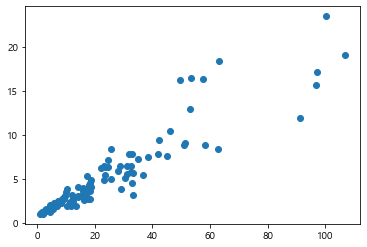

In [173]:
plt.scatter(df['단승'], df['연승'])

### 단승과 순위의 상관관계 - 표본은 적지만 단승이 낮으면 순위도 높은 편.

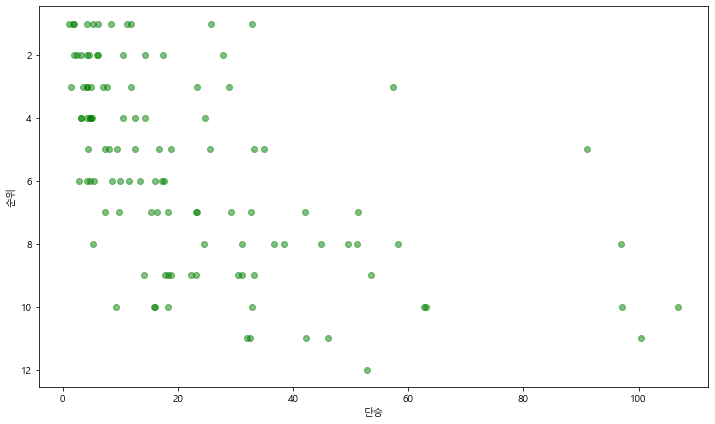

In [188]:
plt.figure(figsize=(12, 7))
plt.scatter(df['단승'], df['순위'], alpha=0.5, c='g')
plt.gca().invert_yaxis()
plt.xlabel('단승')
plt.ylabel('순위');

### 연승과 순위의 상관관계 - 표본은 적지만 단승이 낮으면 순위도 높은 편.

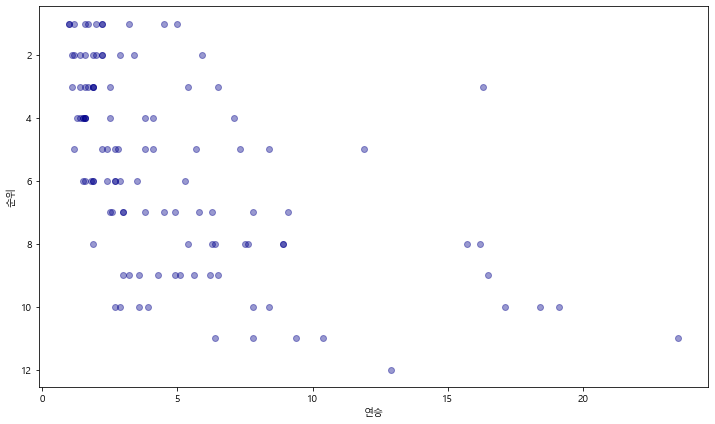

In [190]:
plt.figure(figsize=(12, 7))
plt.scatter(df['연승'], df['순위'], alpha=0.4, c='darkblue')
plt.gca().invert_yaxis()
plt.xlabel('연승')
plt.ylabel('순위');

### 나이와 순위의 상관관계 - 크게 의미는 없는 것 같음.

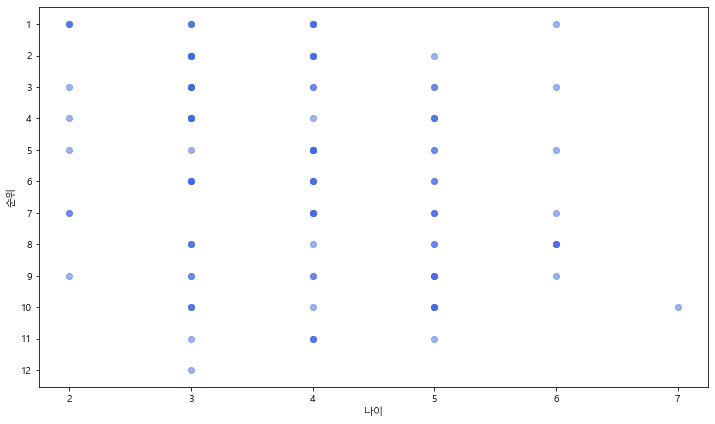

In [197]:
plt.figure(figsize=(12, 7))
plt.scatter(df['연령'], df['순위'], alpha=0.5, c='royalblue')
plt.gca().invert_yaxis()
plt.yticks(range(1, 13))
plt.xlabel('나이')
plt.ylabel('순위');

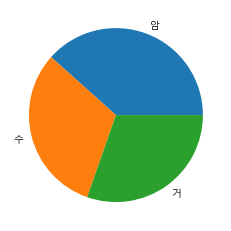

In [242]:
plt.pie(df['성별'].value_counts(), labels=list(df['성별'].value_counts().index));

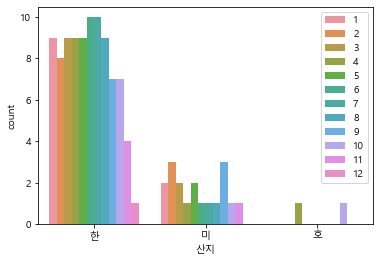

In [206]:
sns.countplot(x='산지', hue='순위', data=df, )
plt.legend(loc='upper right');

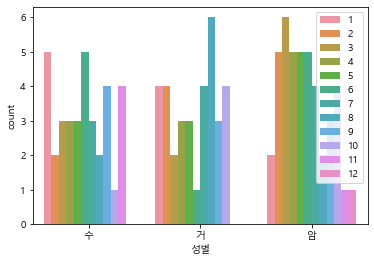

In [203]:
sns.countplot(x='성별', hue='순위', data=df)
plt.legend(loc='upper right');

<AxesSubplot:xlabel='마체중', ylabel='Count'>

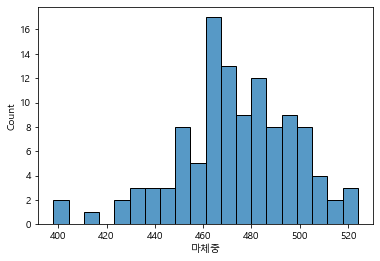

In [215]:
sns.histplot(x='마체중', data=df, bins=20)

<AxesSubplot:xlabel='중량', ylabel='Count'>

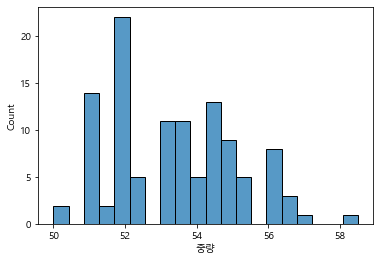

In [216]:
sns.histplot(x='중량', data=df, bins=20)

### 단승 - 우승마 맞추는 경마

In [218]:
df['기수명'].value_counts()

신지         9
안토니오       8
송재철        8
이찬호        8
이혁         7
임기원        6
박태종        6
(-4)김효정    5
(-2)이철경    5
박병윤        5
빅투아르       4
조재로        4
정정희        3
이기회        3
(-4)김덕현    3
문정균        3
얀          2
김정준        2
박현우        2
(-1)김태훈    2
박상우        2
이준철        2
신형철        2
이동국        2
(-1)하정훈    2
부민호        2
황종우        1
윤영민        1
방춘식        1
안효리        1
김옥성        1
Name: 기수명, dtype: int64

### 기수명 : 임기원 - 6번 참가해서 3번 1등, 승률 굉장히 높음.

In [219]:
df.loc[df['순위'] == 1]['기수명'].value_counts()

임기원        3
송재철        2
이찬호        1
박병윤        1
안토니오       1
김옥성        1
박태종        1
(-2)이철경    1
Name: 기수명, dtype: int64

In [224]:
df.loc[df['순위'] == 1]['마주명'].value_counts()

문창완      1
김영식      1
최용도      1
김경민      1
배태곤      1
이종천      1
이방훈      1
서상주      1
포트폴리오    1
조금제      1
서창식      1
Name: 마주명, dtype: int64

In [226]:
df.loc[df['순위'] == 1]['조교사명'].value_counts()

박재우    2
최봉주    1
김점오    1
박윤규    1
서홍수    1
신삼영    1
안병기    1
서인석    1
정호익    1
하재흥    1
Name: 조교사명, dtype: int64

<AxesSubplot:xlabel='중량', ylabel='Count'>

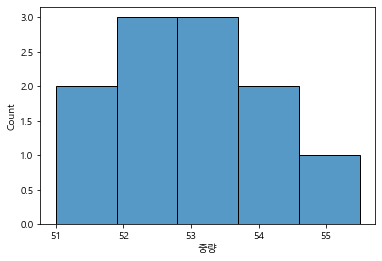

In [232]:
sns.histplot(df.loc[df['순위'] == 1]['중량'])

<AxesSubplot:xlabel='중량', ylabel='Count'>

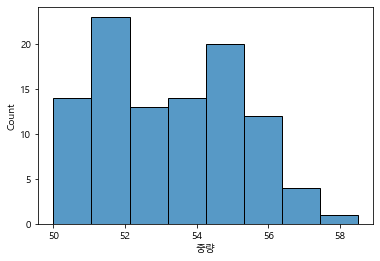

In [234]:
sns.histplot(df.loc[df['순위'] != 1]['중량'])

<AxesSubplot:xlabel='마체중', ylabel='Count'>

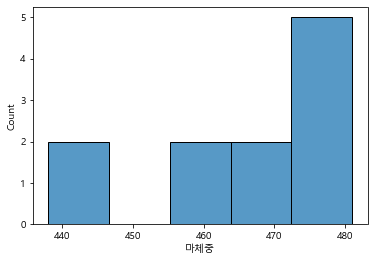

In [246]:
sns.histplot(df.loc[df['순위'] == 1]['마체중'])

<AxesSubplot:xlabel='마체중', ylabel='Count'>

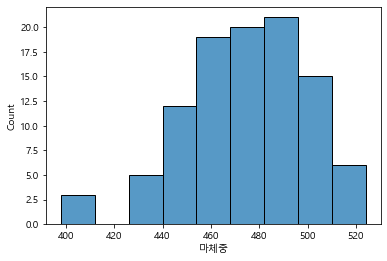

In [247]:
sns.histplot(df.loc[df['순위'] != 1]['마체중'])

### 쌍승 - 1, 2 순위 맞추기

### 수치형 데이터 상관 관계없음.

<AxesSubplot:>

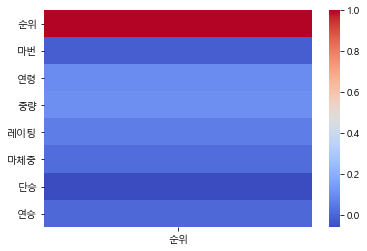

In [254]:
sns.heatmap(df.loc[(df['순위'] == 1) | (df['순위'] == 2)].corr()[['순위']], cmap='coolwarm')

In [245]:
df.loc[(df['순위'] == 1) | (df['순위'] == 2)]['기수명'].value_counts()

임기원        3
송재철        3
이찬호        2
안토니오       2
이준철        1
박병윤        1
박태종        1
황종우        1
(-4)김효정    1
(-4)김덕현    1
신지         1
(-1)하정훈    1
(-1)김태훈    1
김옥성        1
빅투아르       1
(-2)이철경    1
Name: 기수명, dtype: int64

# 결론 - 데이터가 부족하다, 그래도 단승식이라면 기수명이 '임기원'인 사람으로 참여.